In [1]:
import pandas
import numpy

In [2]:
# Read the data
df = pandas.read_csv('sales_data.csv')
df.head()

,sales,date
0,112,2022-08-21
1,118,2022-08-22
2,132,2022-08-23
3,129,2022-08-24
4,121,2022-08-25


In [3]:
# date to datetime object
df['date'] = pandas.to_datetime(df['date'])

# date to index
df.set_index('date', inplace=True)


In [4]:
# general info about the data
df.info()

# check if there are any missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2022-08-21 to 2023-01-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


sales    0
dtype: int64

<AxesSubplot:xlabel='date'>

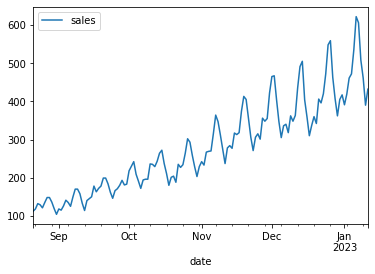

In [5]:
# plot the sales in a line chart
df.plot()

In [6]:
# drop na
df.dropna(inplace=True)

In [7]:
# split the data into train and test with in-built function
from sklearn.model_selection import train_test_split

X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [8]:
# create a dataframe with ds and y
df_train = pandas.DataFrame({'ds': X_train.index, 'y': y_train})

df_train

,ds,y
date,,
2022-08-21,2022-08-21,112
2022-08-22,2022-08-22,118
2022-08-23,2022-08-23,132
2022-08-24,2022-08-24,129
2022-08-25,2022-08-25,121
...,...,...
2022-12-09,2022-12-09,362
2022-12-10,2022-12-10,348
2022-12-11,2022-12-11,363


/home/olli/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:45:47 - cmdstanpy - INFO - Chain [1] start processing
15:45:47 - cmdstanpy - INFO - Chain [1] done processing


55.805708099959006


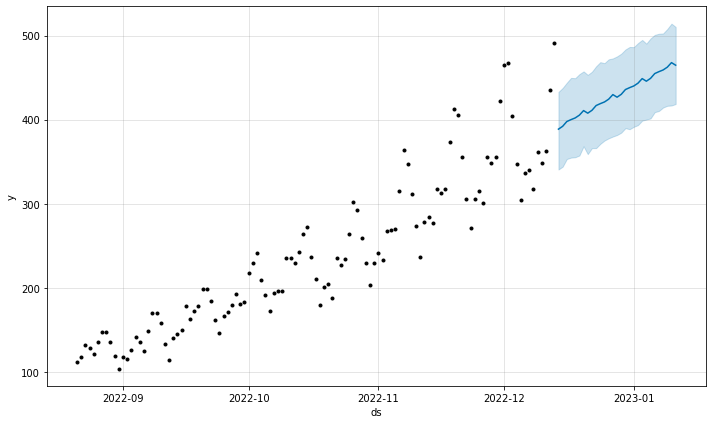

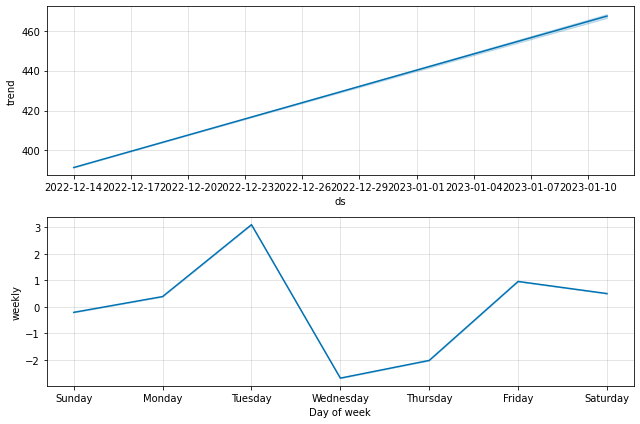

In [9]:
# prophet
from prophet import Prophet

# create a new Prophet object
model = Prophet()

# fit the model
model.fit(df_train)

# create a new dataframe with the dates for which we want to make predictions
future = model.make_future_dataframe(periods=29, freq='D', include_history=False)

# make predictions
forecast = model.predict(future)

# plot the predictions
model.plot(forecast)

# plot the components
model.plot_components(forecast)

# mae
from sklearn.metrics import mean_absolute_error

# get the predictions
predictions = forecast['yhat'].values

# get the actual values
actual = y_test.values

# calculate the mae
mae = mean_absolute_error(actual, predictions)

# print the mae
print(mae)